In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_01_Aug_2019.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
# It will print the type of value of each column
long_time = test_new.correct_longtime
print(type(long_time))
string_time = test_new.stringTime
print(type(string_time))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')
test_new['dateTime_column'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [7]:
test_new.head()

,row ID,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,...,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0,stringTime,correct_longtime,dateTime_column
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-04-15 08:52:00,Row0,1555311120000,74.451979,19.111606,98.371549,18.819155,93.337524,69.969526,95.445534,7.802471,...,22.338103,75.685755,73.945394,0.000000,0.000000,0.000000,0.000000,2019-04-15 08:52,1555311120,2019-04-15 08:52:00
2019-04-15 08:51:00,Row1,1555311060000,73.933103,18.088026,98.186038,18.943335,92.869960,69.969526,95.445534,12.856953,...,26.967692,75.685755,66.649583,56.385432,68.734584,9.127668,2.275890,2019-04-15 08:51,1555311060,2019-04-15 08:51:00
2019-04-15 08:50:00,Row2,1555311000000,73.471742,25.843589,98.371549,33.166077,92.343799,69.969526,95.628479,21.591973,...,26.851837,75.685755,66.587330,56.402658,68.853203,9.136596,2.275735,2019-04-15 08:50,1555311000,2019-04-15 08:50:00
2019-04-15 08:49:00,Row3,1555310940000,73.010381,27.772137,98.371549,35.991205,91.876236,69.850105,95.607810,19.492370,...,26.266369,75.685755,66.373907,56.527297,69.391059,9.138625,2.281882,2019-04-15 08:49,1555310940,2019-04-15 08:49:00
2019-04-15 08:48:00,Row4,1555310880000,72.549020,18.402556,98.186038,19.591687,91.408672,69.969526,95.607810,8.014898,...,26.605640,75.685755,66.529224,56.640964,69.299560,9.121256,2.269317,2019-04-15 08:48,1555310880,2019-04-15 08:48:00


In [8]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

#RWDAKRWRS8V0
# 'AEDAHO_T8_V2','AEWIHO_T8AV2',
multivariate_column_label = ['dateTime_column','DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
                             'AEDATZ_TZCP2','AEDATZKA_8P0','AEDATZ_HO_P1','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

12


In [9]:
size_column = len(multivariate_column_label)
print(size_column)

12


In [10]:
multivariate_data=test_new.iloc[0:25000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]
multivariate_data.head()

,dateTime_column,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,
2019-03-11 03:14:00,2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306
2019-03-11 03:15:00,2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117
2019-03-11 03:16:00,2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430
2019-03-11 03:17:00,2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691
2019-03-11 03:18:00,2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264


In [11]:
multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])

In [12]:
# checking column type
s = multivariate_data['dateTime_column'].dtype
print(s)

datetime64[ns]


In [13]:
# multivariate_data["a"] = pd.to_datetime(multivariate_data["dateTime_column"])
tr = multivariate_data.drop(multivariate_data.columns[-1], axis=1)

In [14]:
tr['Date'] = multivariate_data['dateTime_column'].dt.strftime('%d/%m/%Y')
tr['Time'] = multivariate_data['dateTime_column'].dt.strftime('%H:%M:%S')

In [15]:
e1 = tr['Date'].dtype
print(type(e1))

<class 'numpy.dtype'>


In [16]:
# it will return a column with weekday name
tr['Weekday_name'] = tr.index.weekday_name

In [17]:
# It will return a column with number associated with DAY. like monday =0, Tuesday=1 and so on
tr['weekday'] = multivariate_data['dateTime_column'].apply(lambda x: x.weekday())

In [18]:
tr['TypeofDAY'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 'Weekday', 'weekend') # if the associated number less than 5 then weekend, otherwise weekday
tr['TypeofDAY_number'] = np.where(multivariate_data['dateTime_column'].dt.dayofweek < 5, 1, 0) # 1 for weekday, 0 for weekend

In [19]:
# make all the time(without date) to numeric value
tr['numric_time'] = pd.to_timedelta(tr['Time']).dt.total_seconds()

In [20]:
tr.head()

,dateTime_column,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,Date,Time,Weekday_name,weekday,TypeofDAY,TypeofDAY_number,numric_time
dateTime,,,,,,,,,,,,,,,,,,,
2019-03-11 03:14:00,2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306,11/03/2019,03:14:00,Monday,0,Weekday,1,11640.0
2019-03-11 03:15:00,2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117,11/03/2019,03:15:00,Monday,0,Weekday,1,11700.0
2019-03-11 03:16:00,2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430,11/03/2019,03:16:00,Monday,0,Weekday,1,11760.0
2019-03-11 03:17:00,2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691,11/03/2019,03:17:00,Monday,0,Weekday,1,11820.0
2019-03-11 03:18:00,2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264,11/03/2019,03:18:00,Monday,0,Weekday,1,11880.0


In [21]:
morning_shift = tr.between_time('06:00', '14:00')
day_shift = tr.between_time('14:01', '22:00')
night_shift = tr.between_time('22:01', '05:59')

In [70]:
def change_dataframe(dataframe):
    present_data = dataframe
    return present_data
present_data = change_dataframe(night_shift)

In [71]:
pr_1 = present_data.drop(multivariate_column_label[0], axis=1)

In [72]:
pr_1.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,Date,Time,Weekday_name,weekday,TypeofDAY,TypeofDAY_number,numric_time
dateTime,,,,,,,,,,,,,,,,,,
2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306,11/03/2019,03:14:00,Monday,0,Weekday,1,11640.0
2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117,11/03/2019,03:15:00,Monday,0,Weekday,1,11700.0
2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430,11/03/2019,03:16:00,Monday,0,Weekday,1,11760.0
2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691,11/03/2019,03:17:00,Monday,0,Weekday,1,11820.0
2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264,11/03/2019,03:18:00,Monday,0,Weekday,1,11880.0


In [73]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in pr_1.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  16


In [74]:
if zero_index.size > 0:
    pr_1_modify = pr_1.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    pr_1_modify = pr_1

In [75]:
cols = [-1,-2,-3,-4,-5,-6,-7]
pr_1_modify_drop = pr_1_modify.drop(pr_1_modify.columns[cols], axis=1)

In [76]:
pr_1_modify_drop.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,
2019-03-11 03:14:00,100.0,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306
2019-03-11 03:15:00,100.0,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117
2019-03-11 03:16:00,100.0,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430
2019-03-11 03:17:00,100.0,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691
2019-03-11 03:18:00,100.0,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264


In [77]:
multivariate_data_modify = pr_1_modify_drop

from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

In [78]:
print(multivariate_data_modify.shape)
print(multivariate_data_drop_zero.shape)

(7754, 11)
(7743, 11)


In [79]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

print('shape of multivariate_data_drop_zero_resample: ', multivariate_data_drop_zero_resample.shape)
print('shape of multivariate_data_drop_zero_interpolate: ',multivariate_data_drop_zero_interpolate.shape)

shape of multivariate_data_drop_zero_resample:  (61887, 11)
shape of multivariate_data_drop_zero_interpolate:  (61887, 11)


In [80]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+2
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDATZ_TZCP2
AEDATZKA_8P0
AEDATZ_HO_P1
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [81]:
print('shape of drop_consecutive_same_value_zero: ', drop_consecutive_same_value_zero.shape)
print('shape of drop_consecutive_same_value_interpolate: ', drop_consecutive_same_value_interpolate.shape)

shape of drop_consecutive_same_value_zero:  (7736, 11)
shape of drop_consecutive_same_value_interpolate:  (61880, 11)


In [82]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [83]:
new_dataframe.head()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDATZ_TZCP2,AEDATZKA_8P0,AEDATZ_HO_P1,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,,,
2019-03-11 03:14:00,97.304518,97.482960,46.119388,98.275765,92.911299,97.357811,83.327361,94.076290,96.594824,79.178306
2019-03-11 03:15:00,96.950979,97.167113,46.534541,97.658591,92.709599,97.563494,84.314814,94.003521,96.529931,81.659117
2019-03-11 03:16:00,96.722113,96.937628,46.555631,95.779320,92.519508,97.431268,84.380943,93.851567,96.404936,86.055430
2019-03-11 03:17:00,96.671992,96.868238,45.940449,96.898266,92.876853,97.252133,83.279853,93.727603,96.295169,87.113691
2019-03-11 03:18:00,96.717532,96.901785,44.218947,97.680386,92.997927,97.289250,79.963124,93.643636,96.264723,87.266264


C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too 

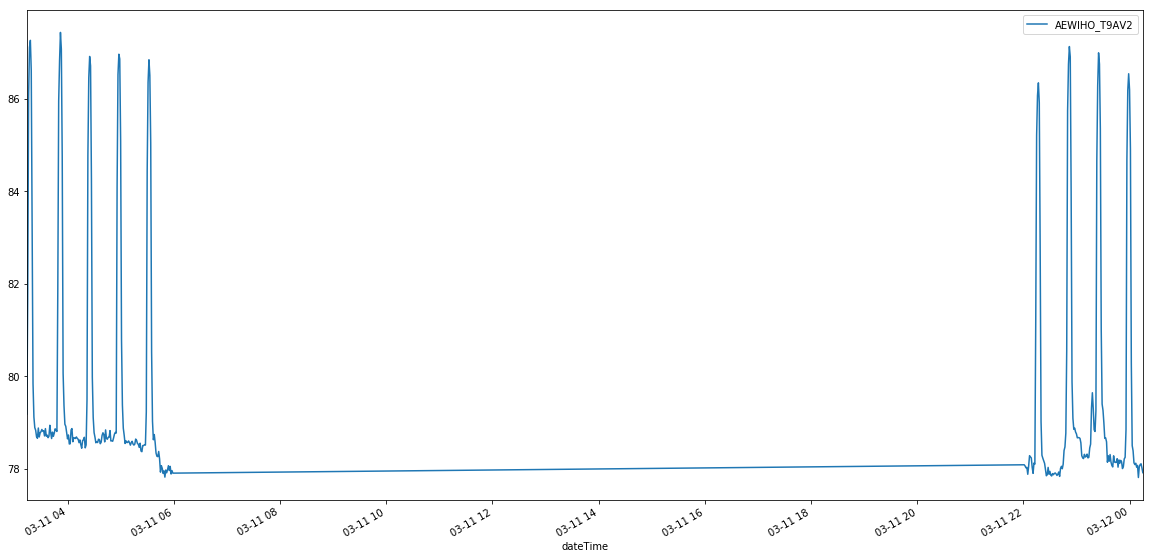

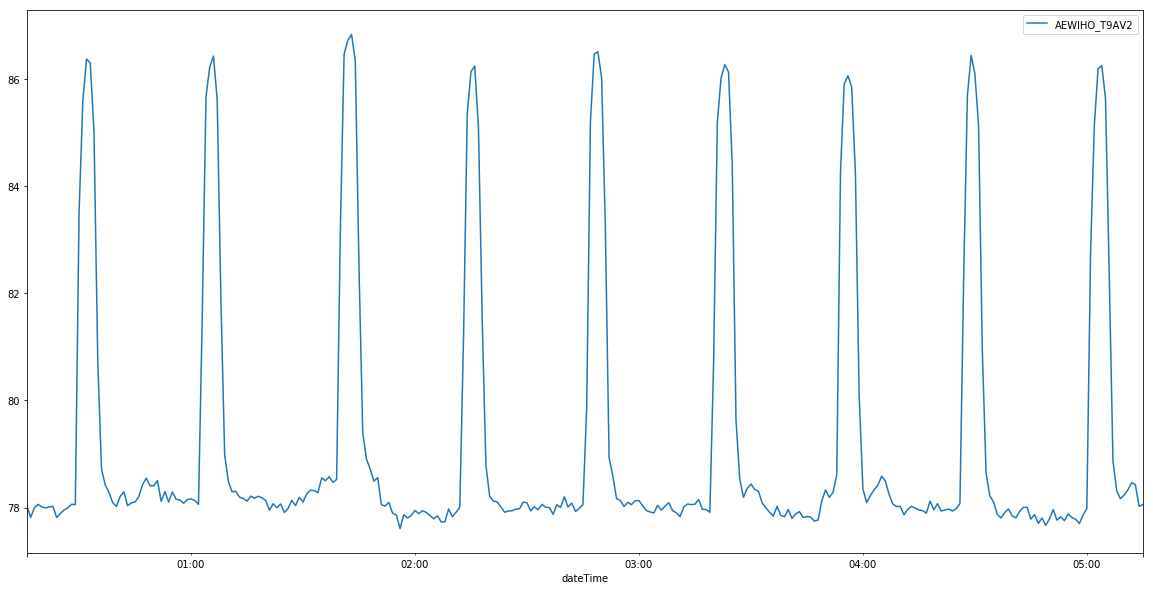

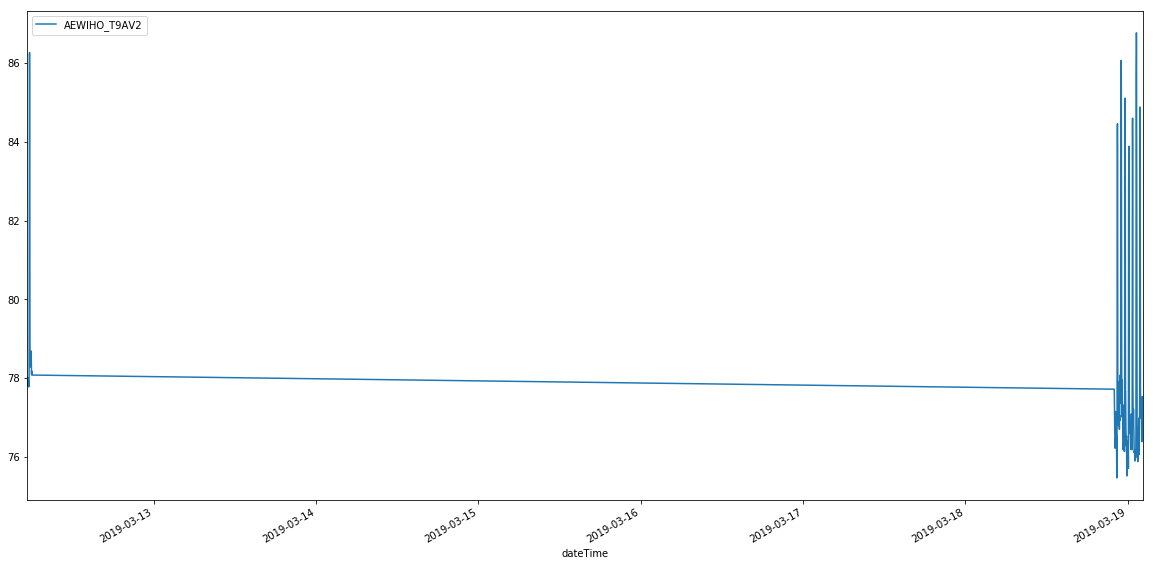

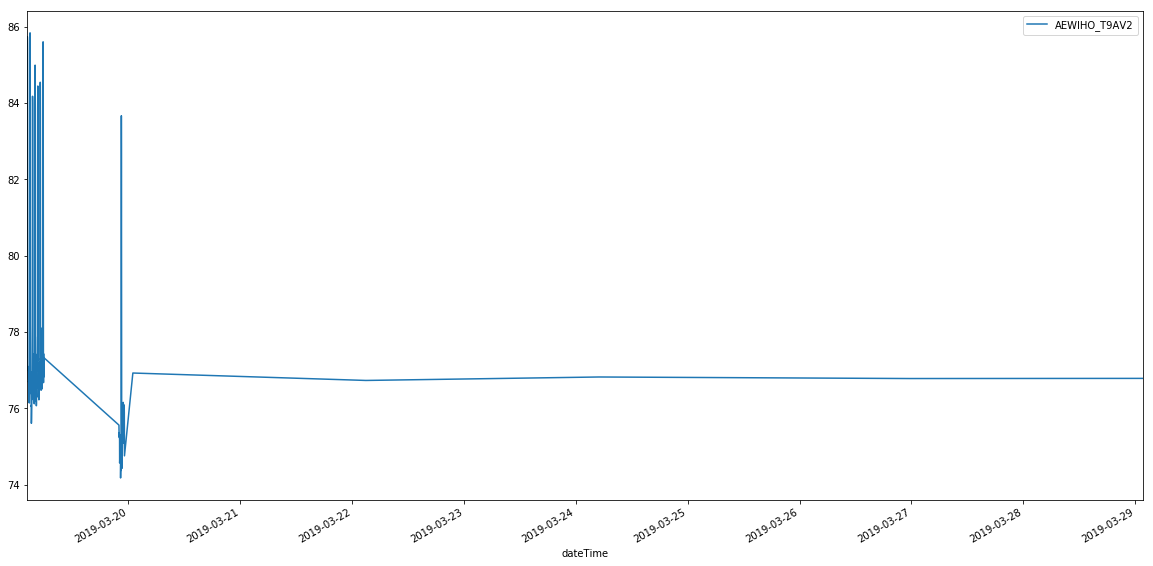

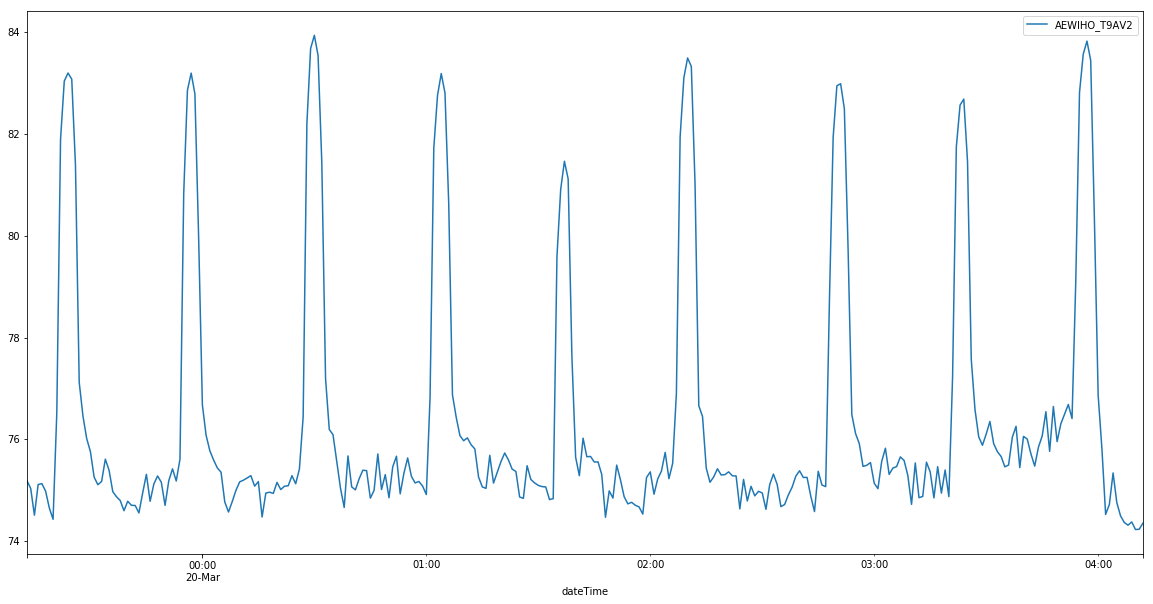

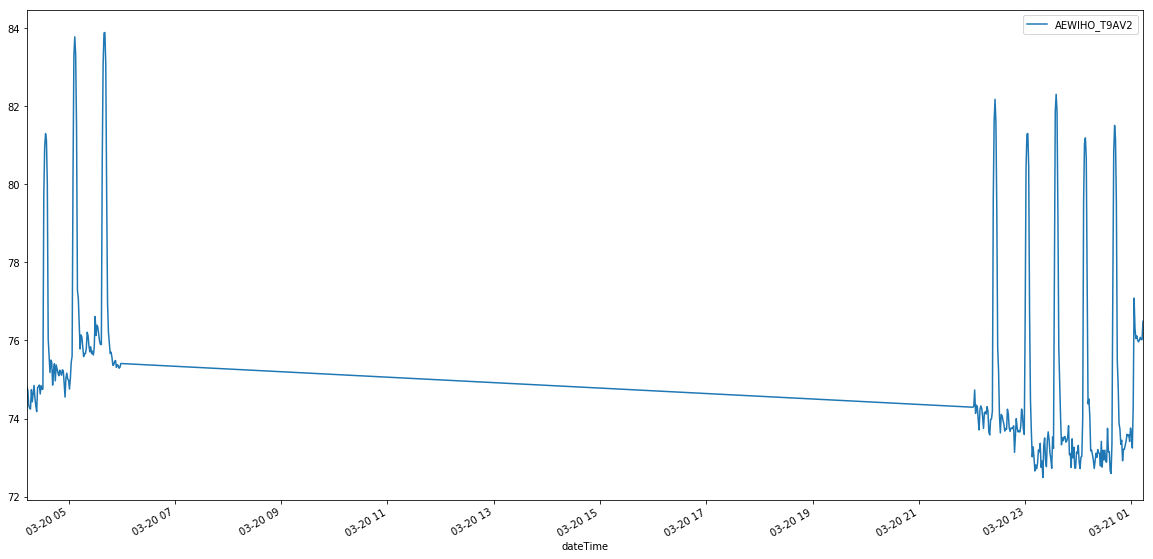

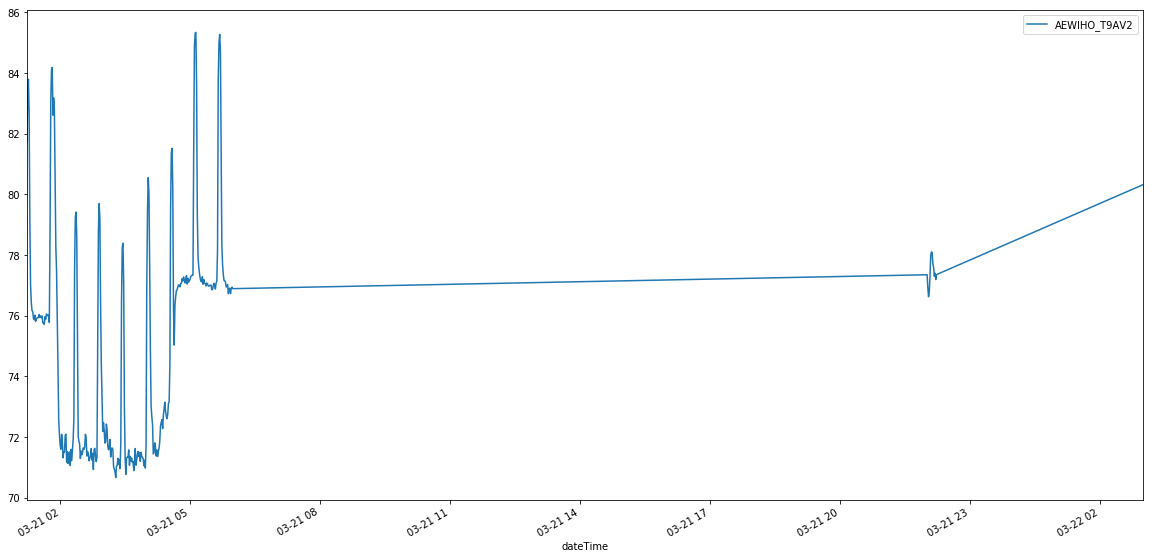

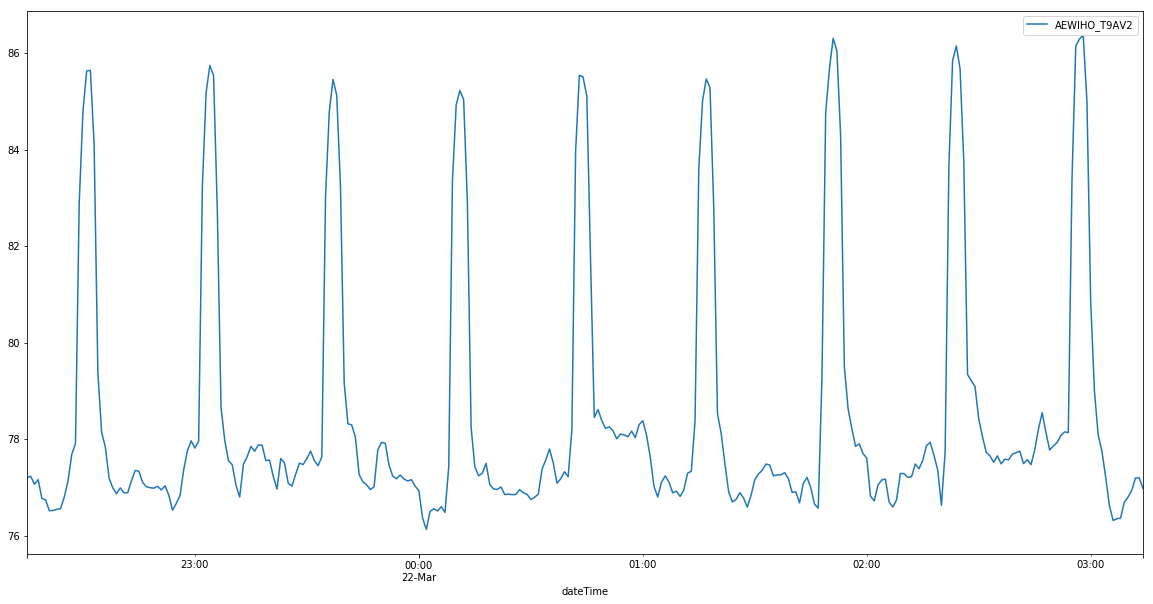

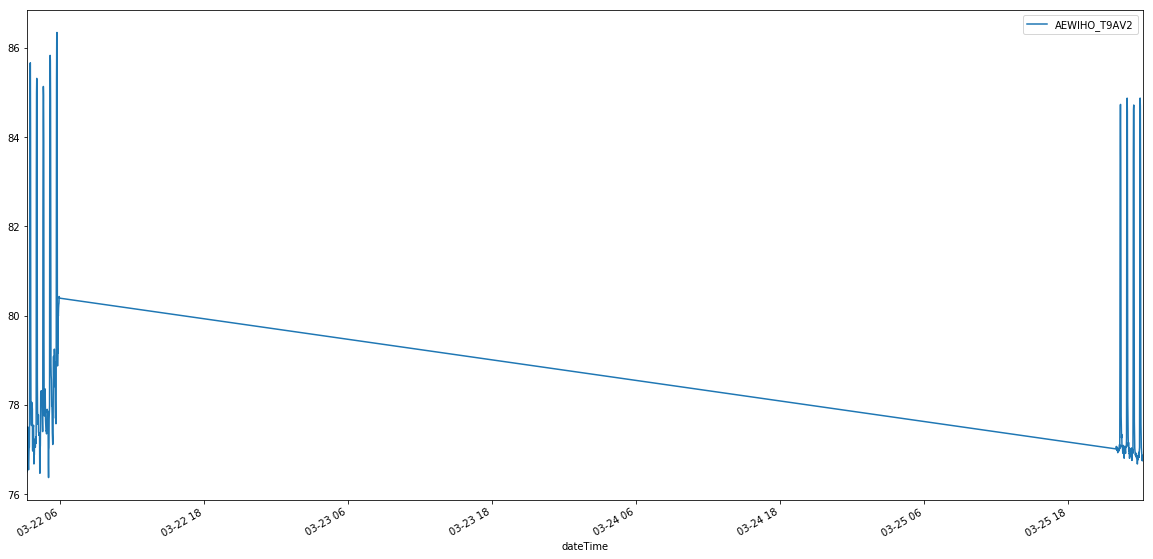

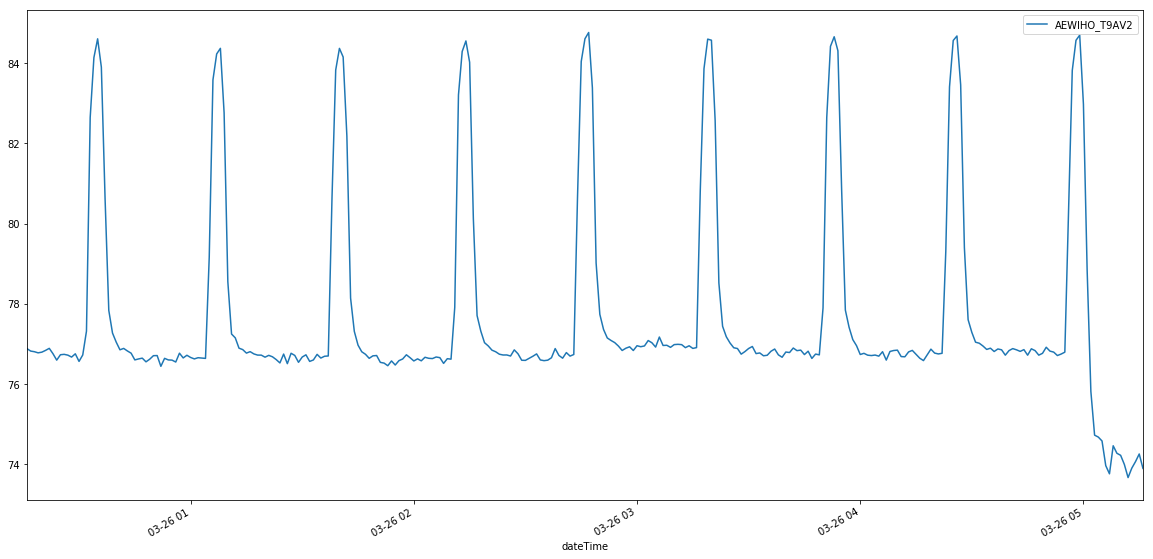

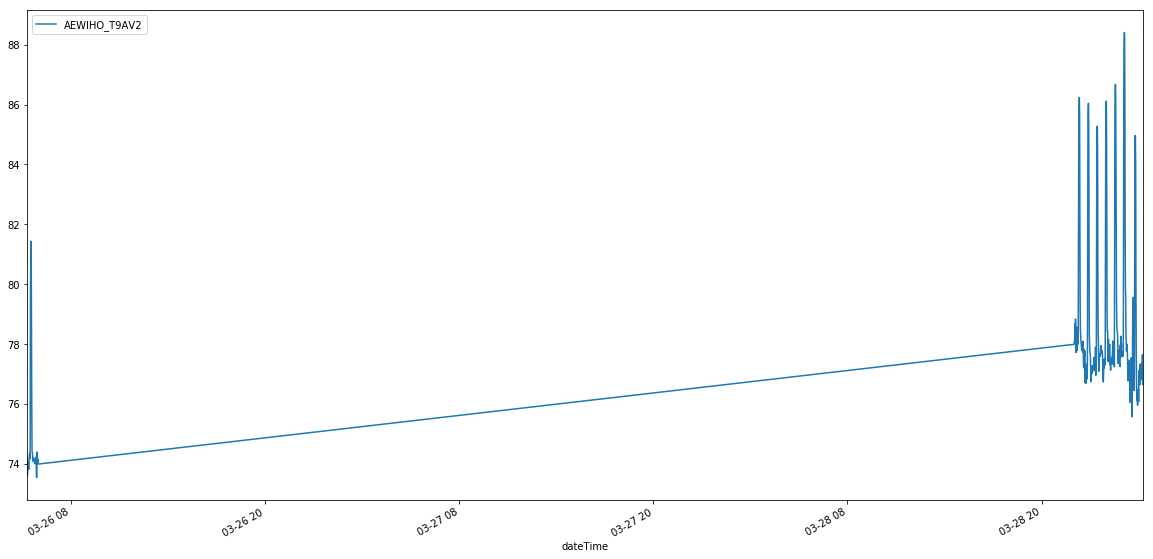

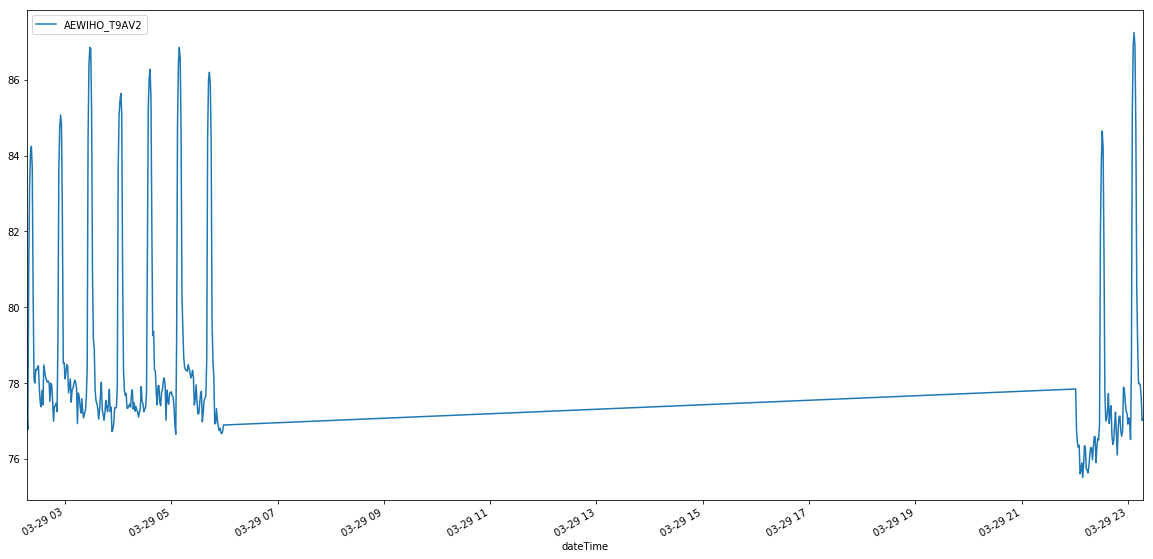

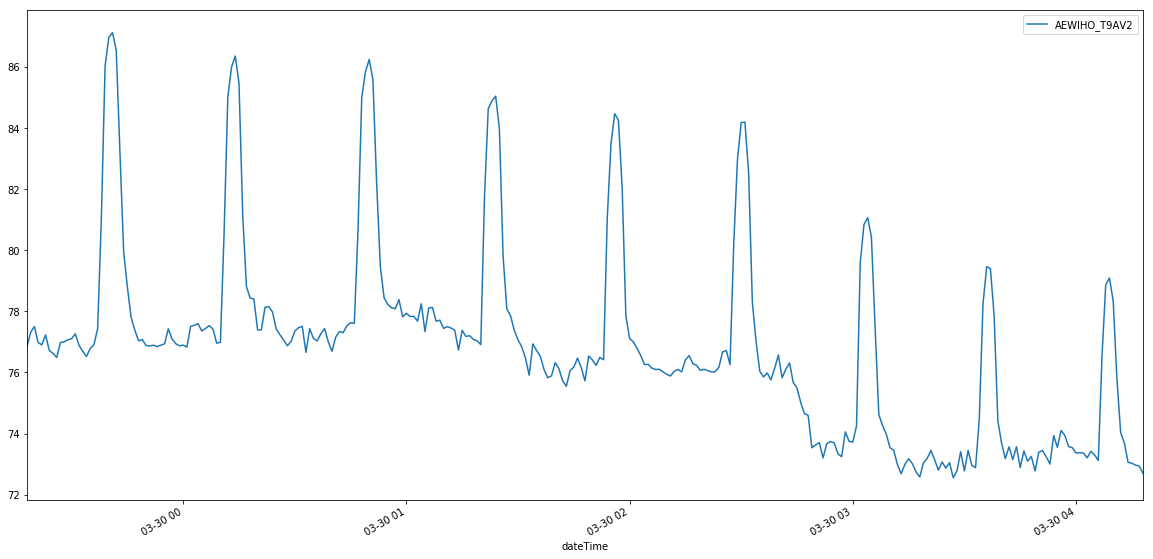

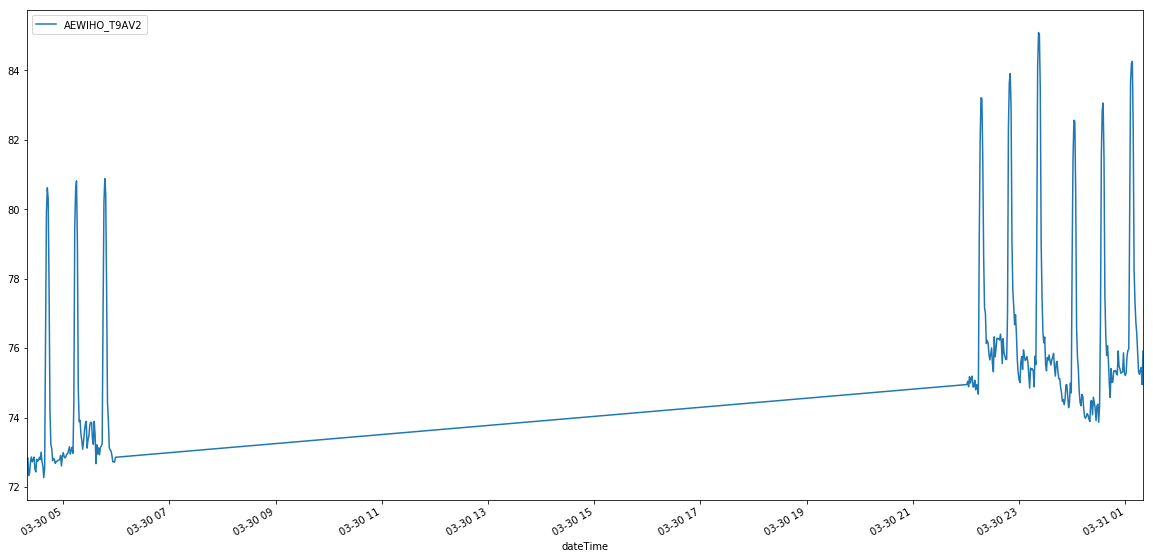

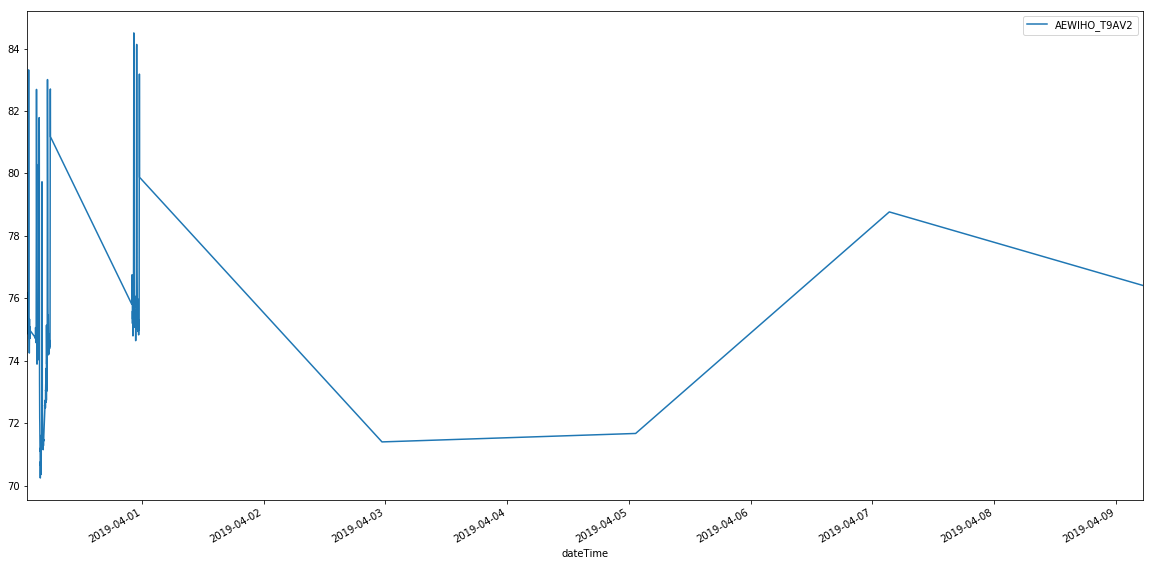

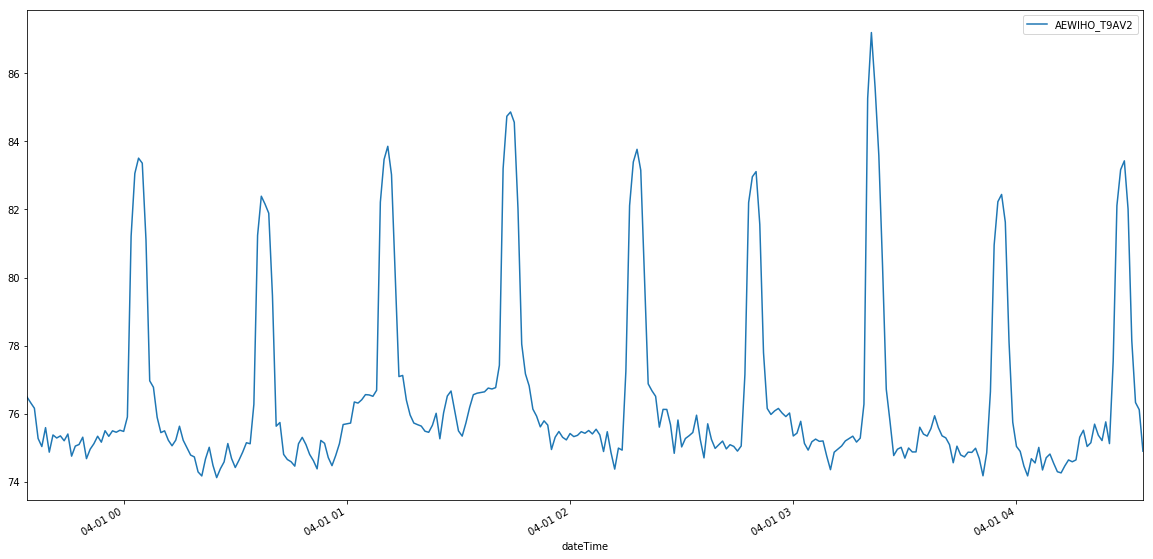

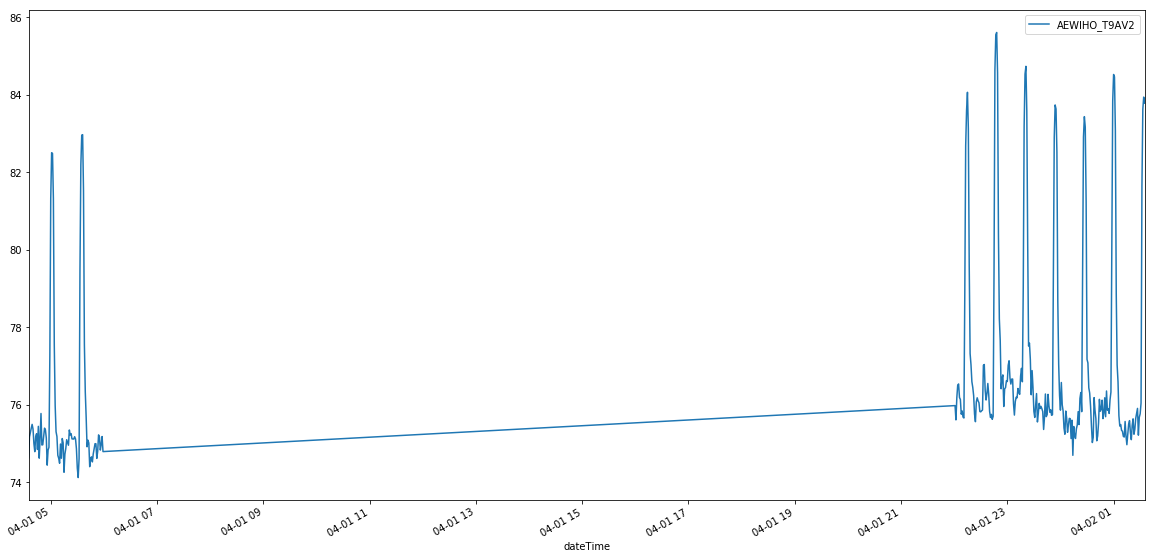

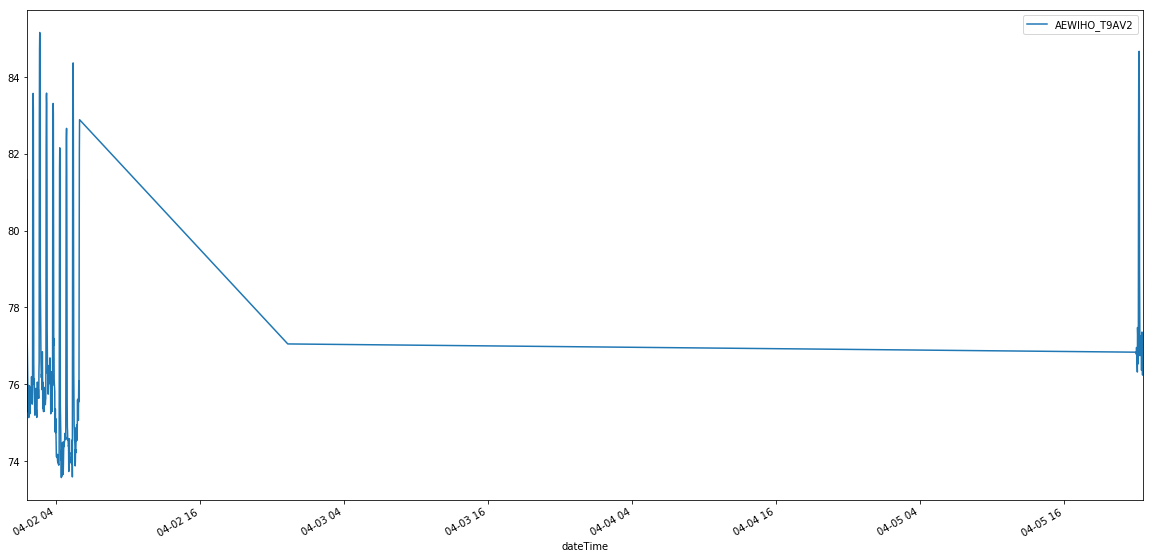

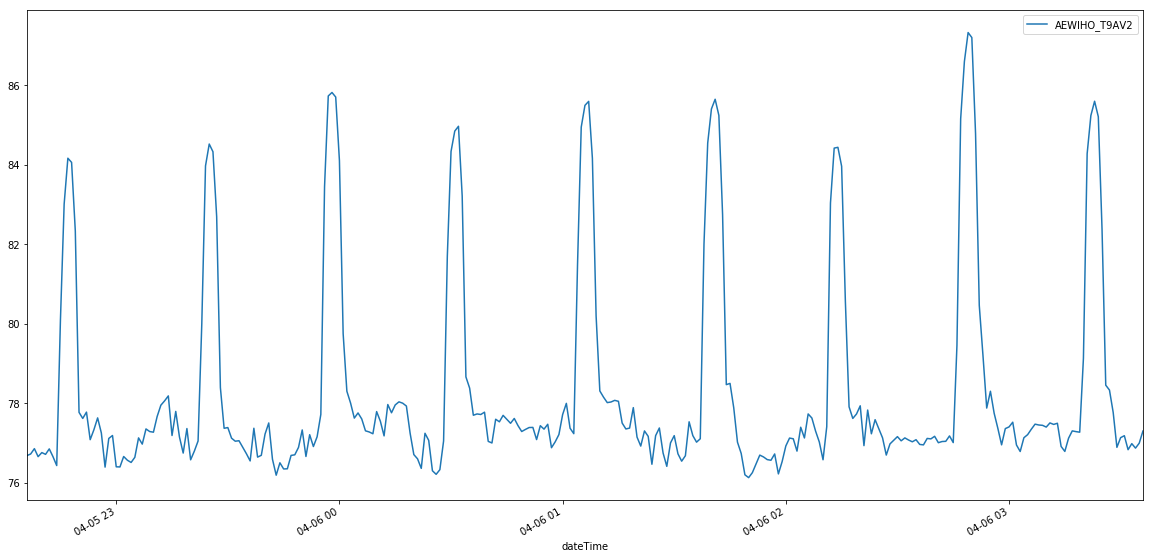

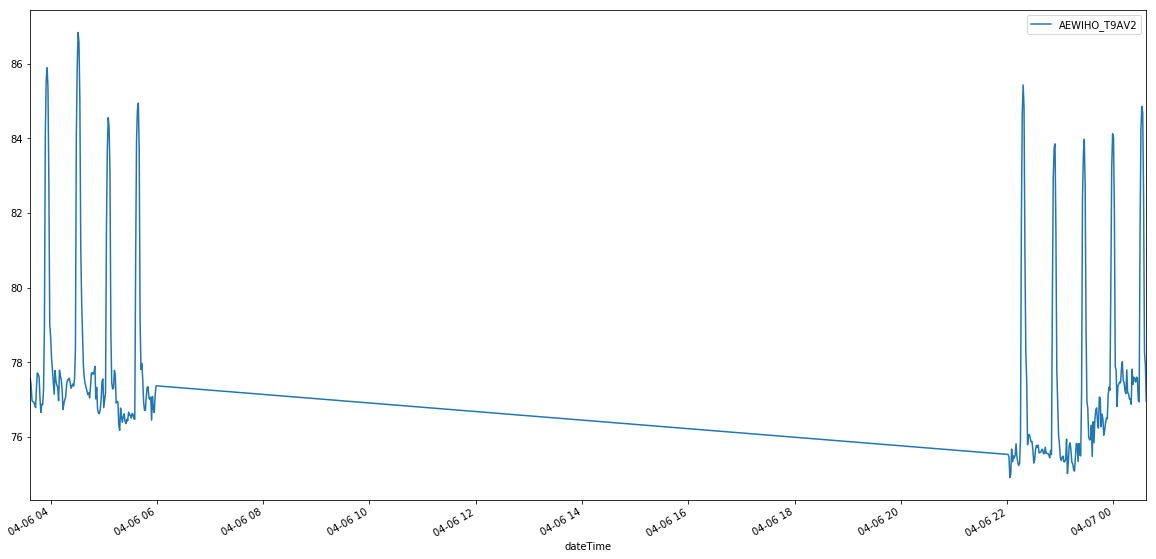

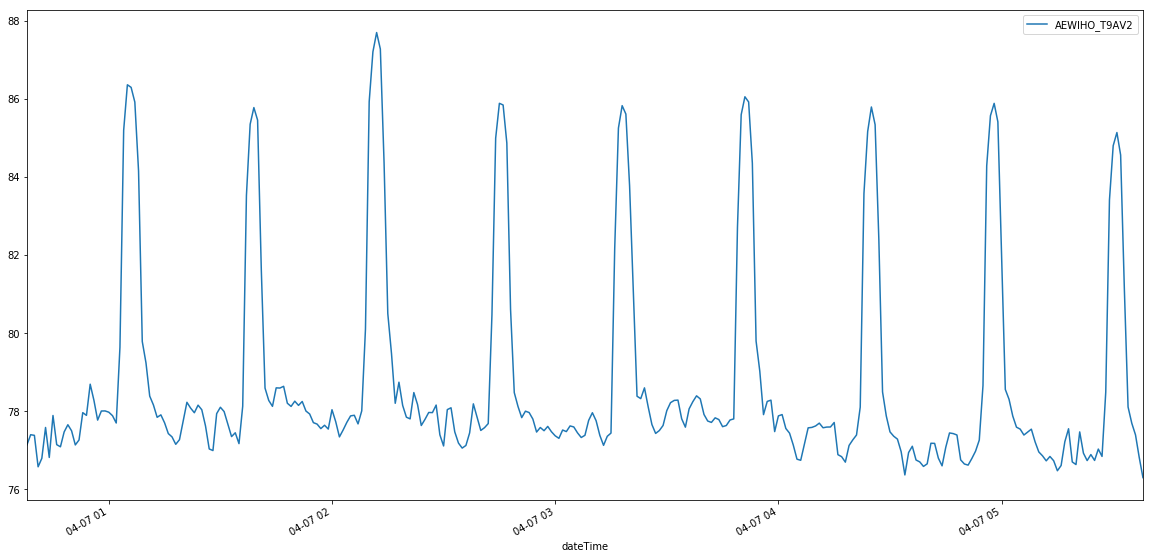

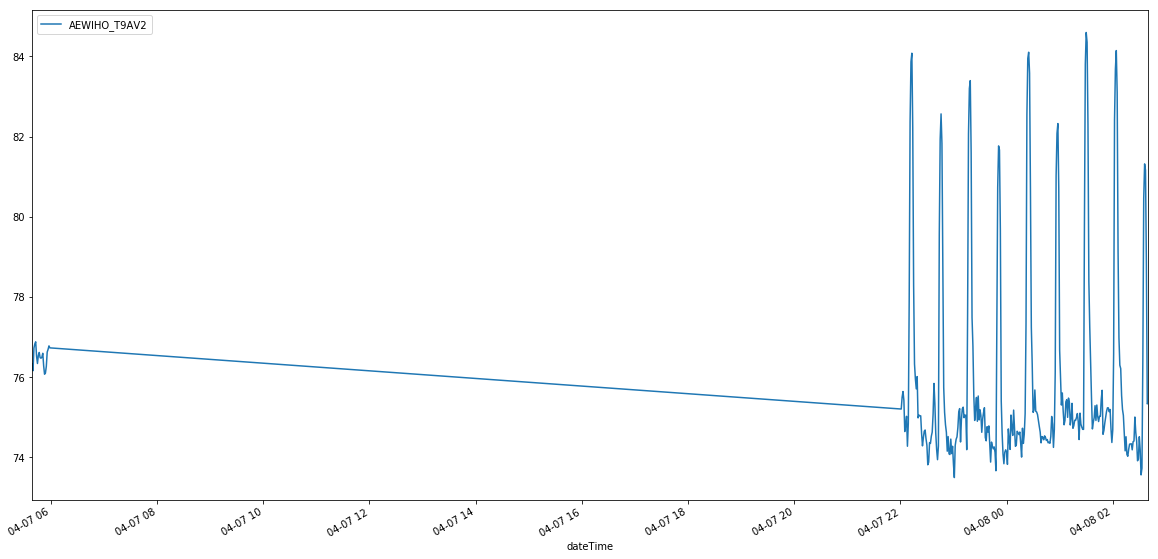

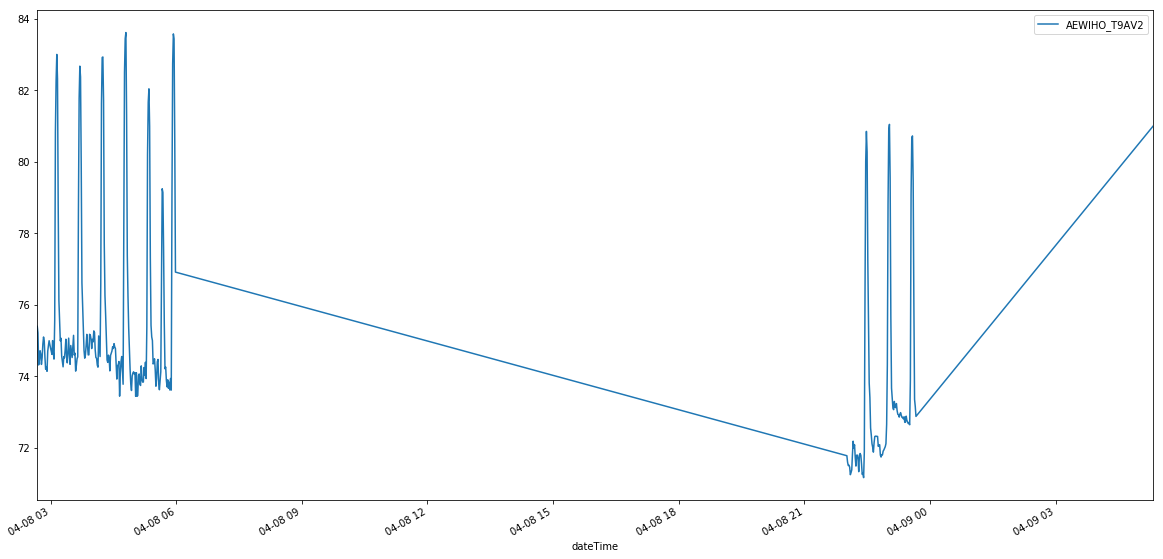

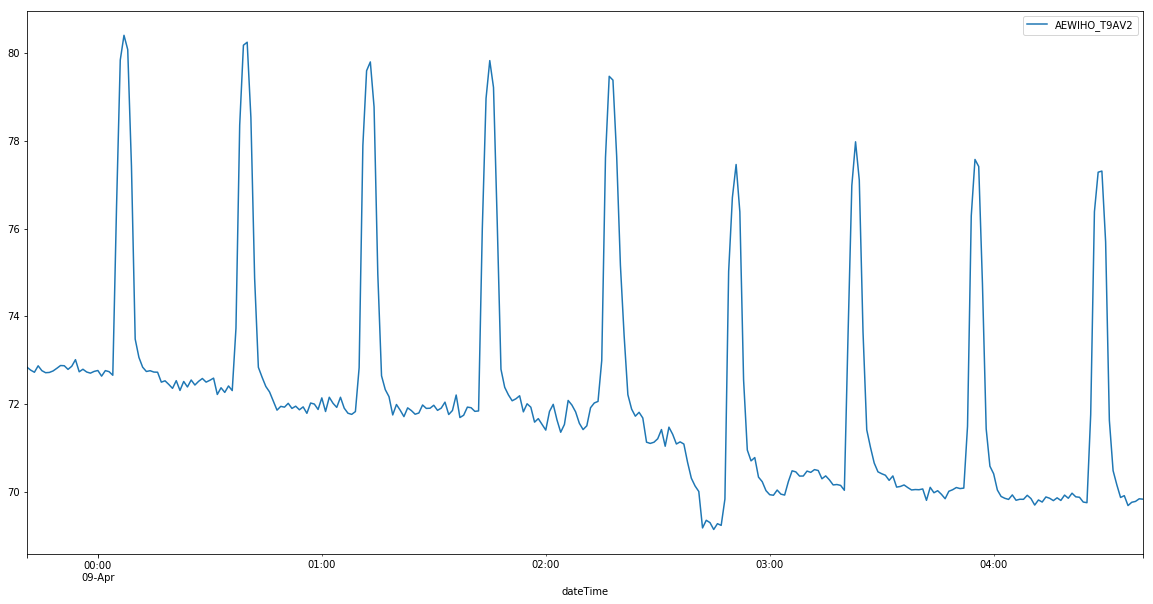

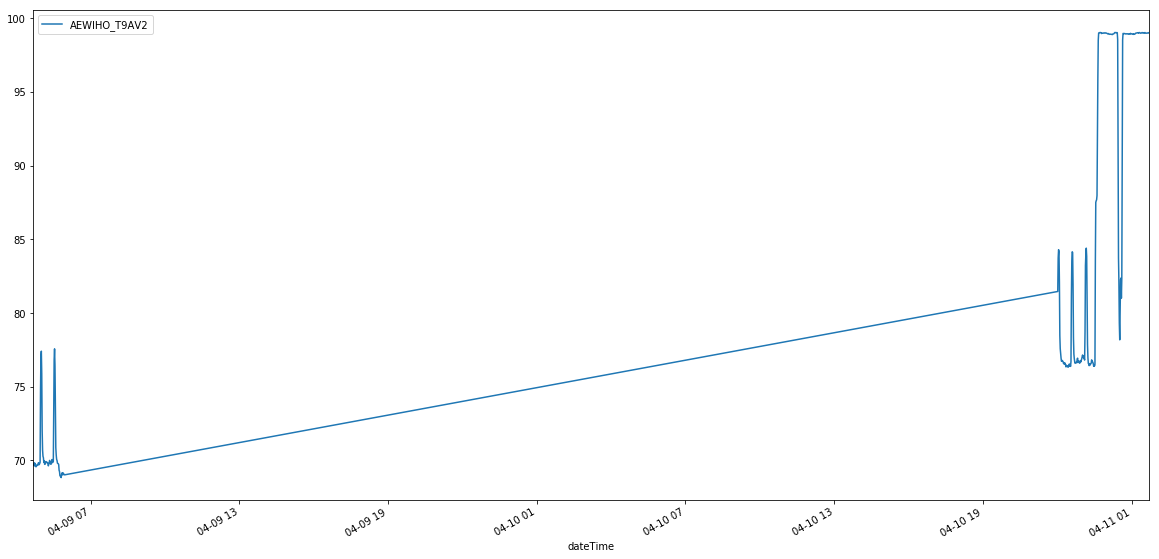

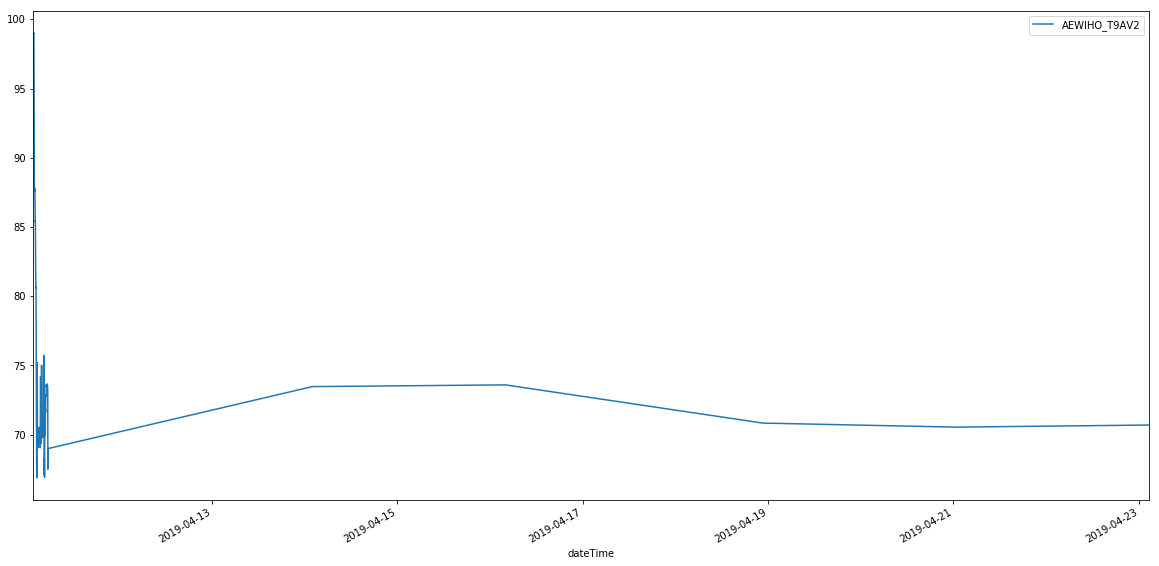

In [84]:
start = 0
end = 300

loop = int(len(new_dataframe)/300)+1
path = 'E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/univariate_data_for_prediction/figure_from_code/fig_target_night/'

for i in range(loop):
    if end < len(new_dataframe):
        
        new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
        
        plt.savefig(path+str(start)+'_night.jpg')
        start = end
        end = end+300
    else:
        start = start
        end = len(new_dataframe)
        new_dataframe.iloc[start:end].plot(y=new_dataframe.columns[-1])
        plt.savefig(path+'final_'+str(len(new_dataframe))+'_night.jpg')
        
#     plt.rcParams['figure.figsize'] =(20,10)

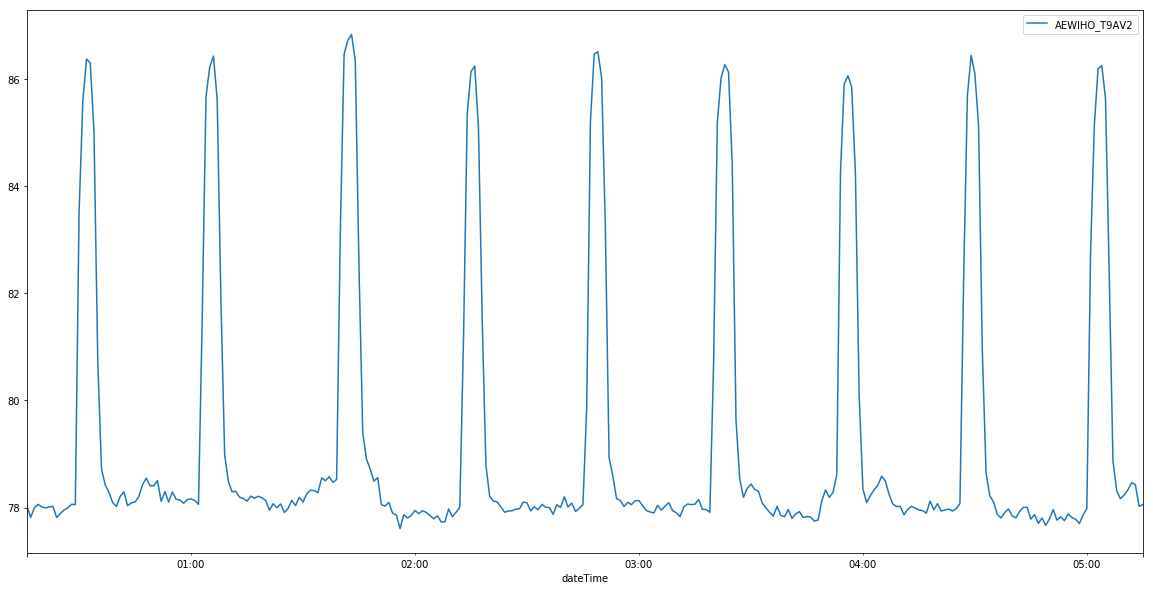

In [89]:
start_1 = 300
end_1 = start_1+300
new_dataframe.iloc[start_1:end_1].plot(y=new_dataframe.columns[-1])

In [93]:
print(max(new_dataframe.iloc[start_1:end_1][new_dataframe.columns[-1]]))

86.8230149742041


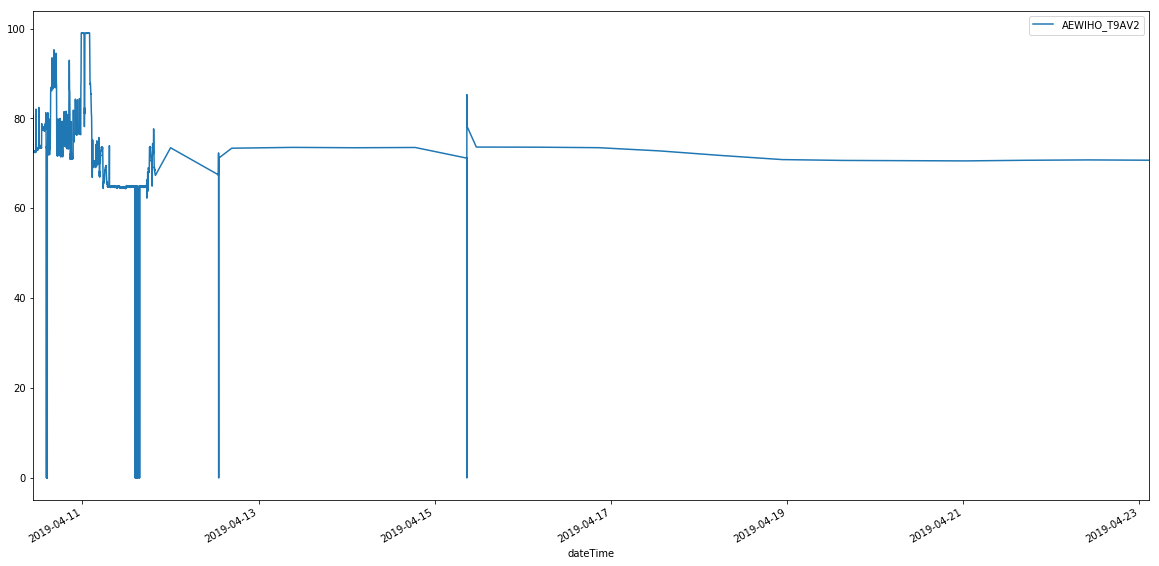

In [42]:
test_new.iloc[0:2000].plot(y=new_dataframe.columns[-1])